In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time
import datetime
import json
import requests
import re
import random
from tqdm import tqdm 
from bs4 import BeautifulSoup

In [2]:
sys.path.insert(0,'../scraper')
from scraper import *
from utilis.functions import *

In [3]:
get_teams()

Fetching teams for 2024-05-31 



,teamId,seasonId,abbrev,logo,darkLogo,isNhl,french,commonName_default,name_default,name_fr,placeName_default,placeName_fr,commonName_fr
0,1,20232024,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,True,False,Devils,New Jersey Devils,Devils du New Jersey,New Jersey,NaN,NaN
1,2,20232024,NYI,https://assets.nhle.com/logos/nhl/svg/NYI_ligh...,https://assets.nhle.com/logos/nhl/svg/NYI_dark...,True,False,Islanders,New York Islanders,Islanders de New York,NY Islanders,NaN,NaN
2,3,20232024,NYR,https://assets.nhle.com/logos/nhl/svg/NYR_ligh...,https://assets.nhle.com/logos/nhl/svg/NYR_dark...,True,False,Rangers,New York Rangers,Rangers de New York,NY Rangers,NaN,NaN
3,4,20232024,PHI,https://assets.nhle.com/logos/nhl/svg/PHI_ligh...,https://assets.nhle.com/logos/nhl/svg/PHI_dark...,True,False,Flyers,Philadelphia Flyers,Flyers de Philadelphie,Philadelphia,Philadelphie,NaN
4,5,20232024,PIT,https://assets.nhle.com/logos/nhl/svg/PIT_ligh...,https://assets.nhle.com/logos/nhl/svg/PIT_dark...,True,False,Penguins,Pittsburgh Penguins,Penguins de Pittsburgh,Pittsburgh,NaN,NaN
5,6,20232024,BOS,https://assets.nhle.com/logos/nhl/svg/BOS_ligh...,https://assets.nhle.com/logos/nhl/svg/BOS_dark...,True,False,Bruins,Boston Bruins,Bruins de Boston,Boston,NaN,NaN
6,7,20232024,BUF,https://assets.nhle.com/logos/nhl/svg/BUF_ligh...,https://assets.nhle.com/logos/nhl/svg/BUF_dark...,True,False,Sabres,Buffalo Sabres,Sabres de Buffalo,Buffalo,NaN,NaN
7,8,20232024,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,True,True,Canadiens,Montréal Canadiens,Canadiens de Montréal,Montréal,NaN,NaN
8,9,20232024,OTT,https://assets.nhle.com/logos/nhl/svg/OTT_ligh...,https://assets.nhle.com/logos/nhl/svg/OTT_dark...,True,False,Senators,Ottawa Senators,Sénateurs d'Ottawa,Ottawa,NaN,Sénateurs
9,10,20232024,TOR,https://assets.nhle.com/logos/nhl/svg/TOR_ligh...,https://assets.nhle.com/logos/nhl/svg/TOR_dark...,True,False,Maple Leafs,Toronto Maple Leafs,Maple Leafs de Toronto,Toronto,NaN,NaN


In [4]:
data = scrape_game(2020020001, file="pbp")

data

,eventId,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,maxRegulationPeriods,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,secondaryReason,awayScore,homeScore,typeCode,descKey,duration,servedByPlayerId,gameId,seasonId,gameDate,gameType,venue,period,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,uniqueId,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,event_player1_fullName,event_player2_fullName,event_player3_fullName,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord
0,51,00:00,20:00,right,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020020001,20202021,2021-01-13,2,Wells Fargo Center,1,0,NaN,NaN,NaN,NaN,NaN,51202002000118,5,5,5v5,8478500.0,8478439.0,8476461.0,8478067.0,8474027.0,NaN,8475208.0,8478542.0,8471724.0,8477404.0,8471675.0,NaN,Ivan Provorov,Travis Konecny,Sean Couturier,Oskar Lindblom,Justin Braun,NaN,Brian Dumoulin,Evan Rodrigues,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,NaN,NaN,NaN,8479394.0,8477465.0,Carter Hart,Tristan Jarry,NaN,NaN
1,52,00:00,20:00,right,faceoff,9,1,REG,3,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020020001,20202021,2021-01-13,2,Wells Fargo Center,1,0,PIT,0.0,8471675.0,8476461.0,NaN,52202002000119,5,5,5v5,8478500.0,8478439.0,8476461.0,8478067.0,8474027.0,NaN,8475208.0,8478542.0,8471724.0,8477404.0,8471675.0,NaN,Ivan Provorov,Travis Konecny,Sean Couturier,Oskar Lindblom,Justin Braun,NaN,Brian Dumoulin,Evan Rodrigues,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,Sidney Crosby,Sean Couturier,NaN,8479394.0,8477465.0,Carter Hart,Tristan Jarry,0.0,0.0
2,53,00:16,19:44,right,shot-on-goal,10,1,REG,3,-74.0,29.0,O,wrist,8477465.0,0.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020020001,20202021,2021-01-13,2,Wells Fargo Center,1,16,PHI,1.0,8478439.0,NaN,NaN,532020020001110,5,5,5v5,8478500.0,8478439.0,8476461.0,8478067.0,8474027.0,NaN,8475208.0,8478542.0,8471724.0,8477404.0,8471675.0,NaN,Ivan Provorov,Travis Konecny,Sean Couturier,Oskar Lindblom,Justin Braun,NaN,Brian Dumoulin,Evan Rodrigues,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,Travis Konecny,NaN,NaN,8479394.0,8477465.0,Carter Hart,Tristan Jarry,74.0,-29.0
3,8,00:23,19:37,right,takeaway,11,1,REG,3,-39.0,-36.0,O,NaN,NaN,0.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020020001,20202021,2021-01-13,2,Wells Fargo Center,1,23,PHI,1.0,8478500.0,NaN,NaN,82020020001111,5,5,5v5,8478500.0,8478439.0,8476461.0,8478067.0,8474027.0,NaN,8475208.0,8478542.0,8471724.0,8477404.0,8471675.0,NaN,Ivan Provorov,Travis Konecny,Sean Couturier,Oskar Lindblom,Justin Braun,NaN,Brian Dumoulin,Evan Rodrigues,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,Ivan Provorov,NaN,NaN,8479394.0,8477465.0,Carter Hart,Tristan Jarry,39.0,36.0
4,54,00:28,19:32,right,blocked-shot,12,1,REG,3,-58.0,-7.0,D,NaN,NaN,0.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020020001,20202021,2021-01-13,2,Wells Fargo Center,1,28,PIT,0.0,8476461.0,8475208.0,NaN,542020020001112,5,5,5v5,8478500.0,8478439.0,8476461.0,8478067.0,8474027.0,NaN,8475208.0,8478542.0,8471724.0,8477404.0,8471675.0,NaN,Ivan Provorov,Travis Konecny,Sean Couturier,Oskar Lindblom,Justin Braun,NaN,Brian Dumoulin,Evan Rodrigues,Kris Letang,Jake Guentzel,Sidney Crosby,NaN,Sean Couturier,Brian Dumoulin,NaN,8479394.0,8477465.0,Carter Hart,Tristan Jarry,-58.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
pbps_list = []
rosters_list = []
shifts_list = []

habs_gameIds = get_team_schedule('MTL', 20232024).query('gameType == 2').gameId.values

for gameId in tqdm(habs_gameIds):
    data = scrape_game(gameId)
    pbps_list.append(data['pbp'])
    rosters_list.append(data['rosters'])
    shifts_list.append(data['shifts'])

pbps = pd.concat(pbps_list)
rosters = pd.concat(rosters_list)
shifts = pd.concat(shifts_list)

print("Done!")

Fetching schedule for MTL in 20232024 



  9%|▊         | 7/82 [00:27<04:55,  3.94s/it]


KeyboardInterrupt: 

In [59]:
pbps_list = []

habs_gameIds = get_team_schedule('MTL', 20232024).query('gameType == 2').gameId.values

for gameId in tqdm(habs_gameIds):
    data = scrape_game(gameId, file='pbp')
    pbps_list.append(data)

Fetching schedule for MTL in 20232024 



 15%|█▍        | 12/82 [00:33<03:17,  2.82s/it]


KeyboardInterrupt: 

In [10]:
df = pd.concat(pbps_list).reset_index(drop=True)

df.head()

,eventId,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,maxRegulationPeriods,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,awayScore,homeScore,typeCode,descKey,duration,servedByPlayerId,secondaryReason,gameId,seasonId,gameDate,gameType,venue,period,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,uniqueId,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord
0,102,00:00,20:00,right,period-start,10,1,REG,3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,0,NaN,NaN,NaN,NaN,NaN,1022023020005110,5,5,5v5,8478483.0,8479318.0,8476853.0,8477479.0,8474673.0,NaN,8476875.0,8480018.0,8476981.0,8481540.0,8475233.0,NaN,Mitch Marner,Auston Matthews,Morgan Rielly,Tyler Bertuzzi,TJ Brodie,NaN,Mike Matheson,Nick Suzuki,Josh Anderson,Cole Caufield,David Savard,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,NaN,NaN
1,101,00:00,20:00,right,faceoff,11,1,REG,3,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,0,MTL,0.0,8480018.0,8479318.0,NaN,1012023020005111,5,5,5v5,8478483.0,8479318.0,8476853.0,8477479.0,8474673.0,NaN,8476875.0,8480018.0,8476981.0,8481540.0,8475233.0,NaN,Mitch Marner,Auston Matthews,Morgan Rielly,Tyler Bertuzzi,TJ Brodie,NaN,Mike Matheson,Nick Suzuki,Josh Anderson,Cole Caufield,David Savard,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,0.0,0.0
2,1731,00:04,19:56,right,hit,12,1,REG,3,18.0,-40.0,N,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,4,TOR,1.0,8476853.0,8476981.0,NaN,17312023020005112,5,5,5v5,8478483.0,8479318.0,8476853.0,8477479.0,8474673.0,NaN,8476875.0,8480018.0,8476981.0,8481540.0,8475233.0,NaN,Mitch Marner,Auston Matthews,Morgan Rielly,Tyler Bertuzzi,TJ Brodie,NaN,Mike Matheson,Nick Suzuki,Josh Anderson,Cole Caufield,David Savard,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,-18.0,40.0
3,103,00:36,19:24,right,takeaway,16,1,REG,3,64.0,-28.0,D,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,36,TOR,1.0,8474673.0,NaN,NaN,1032023020005116,5,5,5v5,8478483.0,8479318.0,8476853.0,8477479.0,8474673.0,NaN,8476981.0,8482087.0,8481540.0,8480192.0,8481523.0,NaN,Mitch Marner,Auston Matthews,Morgan Rielly,Tyler Bertuzzi,TJ Brodie,NaN,Josh Anderson,Kaiden Guhle,Cole Caufield,Johnathan Kovacevic,Kirby Dach,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,-64.0,28.0
4,62,00:49,19:11,right,shot-on-goal,22,1,REG,3,-49.0,-15.0,O,wrist,8474596.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,49,TOR,1.0,8477503.0,NaN,NaN,622023020005122,5,5,5v5,8475906.0,8477503.0,8476931.0,8477939.0,8475166.0,NaN,8481618.0,8476981.0,8482087.0,8480192.0,8481523.0,NaN,John Klingberg,Max Domi,Jake McCabe,William Nylander,John Tavares,NaN,Alex Newhook,Josh Anderson,Kaiden Guhle,Johnathan Kovacevic,Kirby Dach,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,49.0,15.0


In [13]:
df.query("event == 'goal' and eventTeam == 'MTL'").si

,eventId,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,maxRegulationPeriods,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,awayScore,homeScore,typeCode,descKey,duration,servedByPlayerId,secondaryReason,gameId,seasonId,gameDate,gameType,venue,period,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,uniqueId,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord
14,202,03:01,16:59,right,goal,50,1,REG,3,81.0,-8.0,O,wrist,8478492.0,1.0,2.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,1,181,MTL,0.0,8478133.0,NaN,NaN,2022023020005150,5,5,5v5,8475906.0,8478483.0,8476931.0,8479318.0,8477479.0,NaN,8480018.0,8476981.0,8482087.0,8481540.0,8480192.0,NaN,John Klingberg,Mitch Marner,Jake McCabe,Auston Matthews,Tyler Bertuzzi,NaN,Nick Suzuki,Josh Anderson,Kaiden Guhle,Cole Caufield,Johnathan Kovacevic,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,81.0,-8.0
112,212,01:10,18:50,left,goal,314,2,REG,3,-85.0,-9.0,O,deflected,8478492.0,10.0,10.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,2,1270,MTL,0.0,8481618.0,8483515.0,8481523.0,21220230200052314,5,5,5v5,8479393.0,8480043.0,8470966.0,8480144.0,8471817.0,NaN,8475848.0,8482087.0,8480192.0,8476871.0,8477497.0,NaN,Noah Gregor,Timothy Liljegren,Mark Giordano,David Kampf,Ryan Reaves,NaN,Brendan Gallagher,Kaiden Guhle,Johnathan Kovacevic,Tanner Pearson,Sean Monahan,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,85.0,9.0
240,226,04:25,15:35,right,goal,628,3,REG,3,48.0,0.0,O,wrist,8478492.0,11.0,27.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,3,2665,MTL,0.0,8481540.0,8476875.0,8480018.0,22620230200053628,5,5,5v5,8475906.0,8477503.0,8476931.0,8477939.0,8475166.0,NaN,8481618.0,8483515.0,8482087.0,8480192.0,8481523.0,NaN,John Klingberg,Max Domi,Jake McCabe,William Nylander,John Tavares,NaN,Alex Newhook,Juraj Slafkovsky,Kaiden Guhle,Johnathan Kovacevic,Kirby Dach,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,48.0,0.0
248,227,05:47,14:13,right,goal,642,3,REG,3,71.0,-1.0,O,tip-in,8478492.0,12.0,27.0,NaN,4.0,3.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,3,2747,MTL,0.0,8481618.0,8482964.0,8481523.0,22720230200053642,5,5,5v5,8478483.0,8475714.0,8479318.0,8480043.0,8470966.0,NaN,8475848.0,8482087.0,8480192.0,8476871.0,8477497.0,NaN,Mitch Marner,Calle Jarnkrok,Auston Matthews,Timothy Liljegren,Mark Giordano,NaN,Brendan Gallagher,Kaiden Guhle,Johnathan Kovacevic,Tanner Pearson,Sean Monahan,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,71.0,-1.0
292,1133,11:55,08:05,right,goal,734,3,REG,3,80.0,13.0,O,backhand,8478492.0,15.0,31.0,NaN,5.0,3.0,NaN,NaN,NaN,NaN,NaN,2023020005,20232024,2023-10-11,2,Scotiabank Arena,3,3115,MTL,0.0,8481058.0,8481093.0,NaN,113320230200053734,5,5,5v5,8475906.0,8479393.0,8476931.0,8480144.0,8471817.0,NaN,8475848.0,8480887.0,8476871.0,8482964.0,8477497.0,NaN,John Klingberg,Noah Gregor,Jake McCabe,David Kampf,Ryan Reaves,NaN,Brendan Gallagher,Jordan Harris,Tanner Pearson,Arber Xhekaj,Sean Monahan,NaN,8478492.0,8474596.0,Ilya Samsonov,Jake Allen,80.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [3]:
teams_dict = fetch_teams_json()['teams']

# print(teams_dict[0].keys())
nhl_abbrev = [team['abbrev'] for team in teams_dict if team['isNhl']]

schedules = [get_team_schedule(abbrev, 20232024) for abbrev in nhl_abbrev]

schedules = pd.concat(schedules)
schedules

Fetching schedule for NJD in 20232024 

Fetching schedule for NYI in 20232024 

Fetching schedule for NYR in 20232024 

Fetching schedule for PHI in 20232024 

Fetching schedule for PIT in 20232024 

Fetching schedule for BOS in 20232024 

Fetching schedule for BUF in 20232024 

Fetching schedule for MTL in 20232024 

Fetching schedule for OTT in 20232024 

Fetching schedule for TOR in 20232024 

Fetching schedule for CAR in 20232024 

Fetching schedule for FLA in 20232024 

Fetching schedule for TBL in 20232024 

Fetching schedule for WSH in 20232024 

Fetching schedule for CHI in 20232024 

Fetching schedule for DET in 20232024 

Fetching schedule for NSH in 20232024 

Fetching schedule for STL in 20232024 

Fetching schedule for CGY in 20232024 

Fetching schedule for COL in 20232024 

Fetching schedule for EDM in 20232024 

Fetching schedule for VAN in 20232024 

Fetching schedule for ANA in 20232024 

Fetching schedule for DAL in 20232024 

Fetching schedule for LAK in 20232024 



,gameId,season,gameType,gameDate,neutralSite,startTimeUTC,easternUTCOffset,venueUTCOffset,venueTimezone,gameState,gameScheduleState,tvBroadcasts,gameCenterLink,venue_default,awayTeam_id,awayTeam_placeName_default,awayTeam_abbrev,awayTeam_logo,awayTeam_darkLogo,awayTeam_awaySplitSquad,awayTeam_hotelLink,awayTeam_hotelDesc,awayTeam_score,homeTeam_id,homeTeam_placeName_default,homeTeam_abbrev,homeTeam_logo,homeTeam_darkLogo,homeTeam_homeSplitSquad,homeTeam_score,periodDescriptor_periodType,periodDescriptor_maxRegulationPeriods,gameOutcome_lastPeriodType,winningGoalie_playerId,winningGoalie_firstInitial_default,winningGoalie_lastName_default,winningGoalScorer_playerId,winningGoalScorer_firstInitial_default,winningGoalScorer_lastName_default,awayTeam_placeName_fr,homeTeam_hotelLink,homeTeam_hotelDesc,winningGoalie_lastName_cs,winningGoalie_lastName_sk,winningGoalScorer_lastName_cs,winningGoalScorer_lastName_sk,homeTeam_placeName_fr,threeMinRecap,awayTeam_airlineLink,awayTeam_airlineDesc,threeMinRecapFr,winningGoalie_lastName_fi,homeTeam_airlineLink,homeTeam_airlineDesc,venue_fr,specialEventLogo,specialEvent_default,venue_es,winningGoalScorer_lastName_fi,awayTeam_goals,homeTeam_goals,winner_abbrev,loser_abbrev,seriesUrl,seriesStatus_round,seriesStatus_seriesAbbrev,seriesStatus_seriesTitle,seriesStatus_seriesLetter,seriesStatus_neededToWin,seriesStatus_topSeedWins,seriesStatus_bottomSeedWins,seriesStatus_gameNumberOfSeries,ticketsLink,awayTeam_radioLink,homeTeam_radioLink,winningGoalScorer_lastName_de,winningGoalScorer_lastName_es,winningGoalScorer_lastName_sv,specialEvent_fr
0,2023010018,20232024,1,2023-09-25,False,2023-09-25T23:00:00Z,-04:00,-04:00,America/Montreal,FINAL,OK,"[{'id': 33, 'market': 'H', 'countryCode': 'CA'...",/gamecenter/njd-vs-mtl/2023/09/25/2023010018,Centre Bell,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,True,https://njdevils.hotelplanner.com/evt/AEF5E16A...,Book Hotel,4.0,8,Montréal,MTL,https://assets.nhle.com/logos/nhl/svg/MTL_ligh...,https://assets.nhle.com/logos/nhl/svg/MTL_dark...,False,2.0,REG,3,REG,8481033.0,A.,Schmid,8482110.0,D.,Mercer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,NJD,MTL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023010020,20232024,1,2023-09-25,False,2023-09-25T23:00:00Z,-04:00,-04:00,US/Eastern,FINAL,OK,[],/gamecenter/phi-vs-njd/2023/09/25/2023010020,Prudential Center,4,Philadelphia,PHI,https://assets.nhle.com/logos/nhl/svg/PHI_ligh...,https://assets.nhle.com/logos/nhl/svg/PHI_dark...,False,NaN,NaN,0.0,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,True,6.0,REG,3,REG,8477970.0,V.,Vanecek,8476292.0,O.,Palat,Philadelphie,https://www.hotelplanner.com,Book Hotel,Vaněček,Vaněček,Palát,Palát,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6.0,NJD,PHI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023010043,20232024,1,2023-09-28,False,2023-09-28T23:00:00Z,-04:00,-04:00,America/New_York,FINAL,OK,"[{'id': 409, 'market': 'A', 'countryCode': 'US...",/gamecenter/njd-vs-nyr/2023/09/28/2023010043,Madison Square Garden,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,False,https://njdevils.hotelplanner.com/evt/9D463A82...,Book Hotel,3.0,3,New York,NYR,https://assets.nhle.com/logos/nhl/svg/NYR_ligh...,https://assets.nhle.com/logos/nhl/svg/NYR_dark...,False,2.0,REG,3,REG,8478902.0,E.,Kallgren,8479415.0,M.,McLeod,NaN,NaN,NaN,Källgren,Källgren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,NJD,NYR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023010060,20232024,1,2023-09-30,False,2023-09-30T23:00:00Z,-04:00,-04:00,US/Eastern,FINAL,OK,"[{'id': 323, 'market': 'H', 'countryCode': 'US...",/gamecenter/njd-vs-phi/2023/09/30/2023010060,Wells Fargo Center,1,New Jersey,NJ

In [5]:

schedules = schedules.query('gameType == 2').drop_duplicates('gameId').reset_index(drop=True)

schedules

,gameId,season,gameType,gameDate,neutralSite,startTimeUTC,easternUTCOffset,venueUTCOffset,venueTimezone,gameState,gameScheduleState,tvBroadcasts,gameCenterLink,venue_default,awayTeam_id,awayTeam_placeName_default,awayTeam_abbrev,awayTeam_logo,awayTeam_darkLogo,awayTeam_awaySplitSquad,awayTeam_hotelLink,awayTeam_hotelDesc,awayTeam_score,homeTeam_id,homeTeam_placeName_default,homeTeam_abbrev,homeTeam_logo,homeTeam_darkLogo,homeTeam_homeSplitSquad,homeTeam_score,periodDescriptor_periodType,periodDescriptor_maxRegulationPeriods,gameOutcome_lastPeriodType,winningGoalie_playerId,winningGoalie_firstInitial_default,winningGoalie_lastName_default,winningGoalScorer_playerId,winningGoalScorer_firstInitial_default,winningGoalScorer_lastName_default,awayTeam_placeName_fr,homeTeam_hotelLink,homeTeam_hotelDesc,winningGoalie_lastName_cs,winningGoalie_lastName_sk,winningGoalScorer_lastName_cs,winningGoalScorer_lastName_sk,homeTeam_placeName_fr,threeMinRecap,awayTeam_airlineLink,awayTeam_airlineDesc,threeMinRecapFr,winningGoalie_lastName_fi,homeTeam_airlineLink,homeTeam_airlineDesc,venue_fr,specialEventLogo,specialEvent_default,venue_es,winningGoalScorer_lastName_fi,awayTeam_goals,homeTeam_goals,winner_abbrev,loser_abbrev,seriesUrl,seriesStatus_round,seriesStatus_seriesAbbrev,seriesStatus_seriesTitle,seriesStatus_seriesLetter,seriesStatus_neededToWin,seriesStatus_topSeedWins,seriesStatus_bottomSeedWins,seriesStatus_gameNumberOfSeries,ticketsLink,awayTeam_radioLink,homeTeam_radioLink,winningGoalScorer_lastName_de,winningGoalScorer_lastName_es,winningGoalScorer_lastName_sv,specialEvent_fr
0,2023020012,20232024,2,2023-10-12,False,2023-10-12T23:30:00Z,-04:00,-04:00,US/Eastern,OFF,OK,"[{'id': 329, 'market': 'N', 'countryCode': 'US...",/gamecenter/det-vs-njd/2023/10/12/2023020012,Prudential Center,17,Detroit,DET,https://assets.nhle.com/logos/nhl/svg/DET_ligh...,https://assets.nhle.com/logos/nhl/svg/DET_dark...,False,NaN,NaN,3.0,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,False,4.0,REG,3,REG,8477970.0,V.,Vanecek,8475287.0,E.,Haula,NaN,https://njdevils.hotelplanner.com/evt/E4E18526...,Book Hotel,Vaněček,Vaněček,NaN,NaN,NaN,/video/recap-red-wings-at-devils-10-12-23-6338...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,NJD,DET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023020017,20232024,2,2023-10-13,False,2023-10-13T23:00:00Z,-04:00,-04:00,US/Eastern,OFF,OK,"[{'id': 521, 'market': 'A', 'countryCode': 'US...",/gamecenter/ari-vs-njd/2023/10/13/2023020017,Prudential Center,53,Arizona,ARI,https://assets.nhle.com/logos/nhl/svg/ARI_ligh...,https://assets.nhle.com/logos/nhl/svg/ARI_dark...,False,NaN,NaN,4.0,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,False,3.0,SO,3,SO,8478872.0,K.,Vejmelka,NaN,NaN,NaN,NaN,https://njdevils.hotelplanner.com/evt/257A00F3...,Book Hotel,NaN,NaN,NaN,NaN,NaN,/video/recap-coyotes-at-devils-10-13-23-633906...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,ARI,NJD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023020036,20232024,2,2023-10-16,False,2023-10-16T23:00:00Z,-04:00,-04:00,US/Eastern,OFF,OK,"[{'id': 409, 'market': 'H', 'countryCode': 'US...",/gamecenter/fla-vs-njd/2023/10/16/2023020036,Prudential Center,13,Florida,FLA,https://assets.nhle.com/logos/nhl/svg/FLA_ligh...,https://assets.nhle.com/logos/nhl/svg/FLA_dark...,False,https://www.jetbluevacations.com/?utm_source=p...,Book with JetBlue Vacations,4.0,1,New Jersey,NJD,https://assets.nhle.com/logos/nhl/svg/NJD_ligh...,https://assets.nhle.com/logos/nhl/svg/NJD_dark...,False,3.0,REG,3,REG,8475683.0,S.,Bobrovsky,8477933.0,S.,Reinhart,Floride,https://njdevils.hotelplanner.com/evt/ABC7B446...,Book Hotel,Bobrovskij,Bobrovskij,NaN,NaN,NaN,/video/recap-panthers-at-devils-10-16-23-63392...,https://www.jetblue.com/#/,Fly JetBlue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0,FLA,NJD,NaN,NaN,Na

In [6]:
scrape_game(schedules.gameId.iloc[100])

{'pbp':      eventId timeInPeriod timeRemaining homeTeamDefendingSide         event  \
 0        102        00:00         20:00                  left  period-start   
 1        103        00:00         20:00                  left       faceoff   
 2          8        00:09         19:51                  left      stoppage   
 3        104        00:09         19:51                  left       faceoff   
 4          9        00:13         19:47                  left           hit   
 ..       ...          ...           ...                   ...           ...   
 371      734        00:00         00:00                  left  shot-on-goal   
 372      733        00:00         00:00                  left  shot-on-goal   
 373      732        00:00         00:00                  left  period-start   
 374      736        00:00         00:00                  left   missed-shot   
 375      746        00:00         00:00                  left      game-end   
 
      sortOrder  periodDescript

<Axes: xlabel='normalized_xCoord_vertical', ylabel='normalized_yCoord_vertical'>

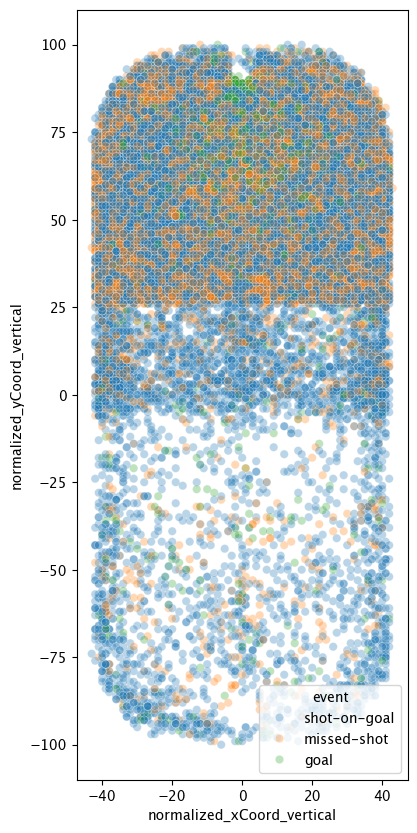

In [28]:
fig, ax = plt.subplots(figsize=(6, 10))

ax.set_aspect('equal')


(pbps
 .assign(normalized_xCoord_vertical = lambda x : -1 * x['normalized_yCoord'],
            normalized_yCoord_vertical = lambda x : x['normalized_xCoord'])
 .query("event in ['goal', 'shot-on-goal', 'missed-shot']")
 .pipe((sns.scatterplot, 'data'), x='normalized_xCoord', y='normalized_yCoord', hue='event', alpha=0.3, ax=ax)
)

<Axes: xlabel='normalized_xCoord', ylabel='normalized_yCoord'>

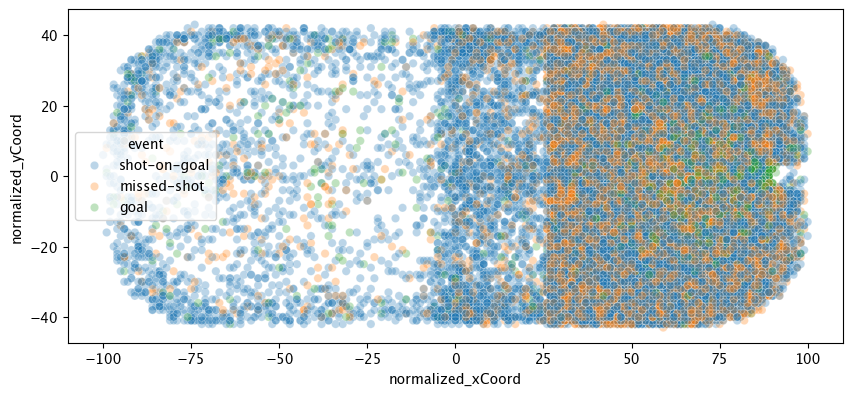

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_aspect('equal')


(pbps
 .assign(normalized_xCoord_vertical = lambda x : -1 * x['normalized_yCoord'],
            normalized_yCoord_vertical = lambda x : x['normalized_xCoord'])
 .query("event in ['goal', 'shot-on-goal', 'missed-shot']")
 .pipe((sns.scatterplot, 'data'), x='normalized_xCoord', y='normalized_yCoord', hue='event', alpha=0.3, ax=ax)
)

In [ ]:
pbps['normalized_xCoord_vertical'] = -1 * pbps['normalized_yCoord']
pbps['normalized_yCoord_vertical'] = pbps['normalized_xCoord']

In [35]:
pbps.to_csv('2024nhl_pbp.csv', index=False, compression='gzip')

In [37]:
rosters.to_csv('2024nhl_rosters.csv', index=False, compression='gzip')

In [39]:
shifts.to_csv('2024nhl_shifts.csv', index=False, compression='gzip')

In [ ]:
slaf_shots = pbps.query("event in ['goal', 'shot-on-goal', 'missed-shot' and ]")

In [40]:
pbps

,eventId,timeInPeriod,timeRemaining,homeTeamDefendingSide,event,sortOrder,periodDescriptor_number,periodType,maxRegulationPeriods,xCoord,yCoord,zoneCode,shotType,goalieInNetId,awaySOG,homeSOG,reason,typeCode,descKey,duration,secondaryReason,awayScore,homeScore,gameId,seasonId,gameDate,gameType,venue,period,elapsedTime,eventTeam,is_home,event_player1_Id,event_player2_Id,event_player3_Id,uniqueId,home_skaters,away_skaters,game_strength,home_skater_id1,home_skater_id2,home_skater_id3,home_skater_id4,home_skater_id5,home_skater_id6,away_skater_id1,away_skater_id2,away_skater_id3,away_skater_id4,away_skater_id5,away_skater_id6,home_skater_fullName1,home_skater_fullName2,home_skater_fullName3,home_skater_fullName4,home_skater_fullName5,home_skater_fullName6,away_skater_fullName1,away_skater_fullName2,away_skater_fullName3,away_skater_fullName4,away_skater_fullName5,away_skater_fullName6,home_goalie_id,away_goalie_id,home_goalie_fullName,away_goalie_fullName,normalized_xCoord,normalized_yCoord,servedByPlayerId
0,102,00:00,20:00,left,period-start,8,1,REG,3,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2023020012,20232024,2023-10-12,2,Prudential Center,1,0,NaN,NaN,NaN,NaN,NaN,1.022023e+14,5,5,5v5,8478507.0,8480002.0,8478414.0,8480860.0,8482110.0,NaN,8481542.0,8474102.0,8477946.0,8479337.0,8478013.0,NaN,John Marino,Nico Hischier,Timo Meier,Kevin Bahl,Dawson Mercer,NaN,Moritz Seider,David Perron,Dylan Larkin,Alex DeBrincat,Jake Walman,NaN,8477970.0,8478024.0,Vitek Vanecek,Ville Husso,NaN,NaN,NaN
1,101,00:00,20:00,left,faceoff,11,1,REG,3,0.0,0.0,N,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2023020012,20232024,2023-10-12,2,Prudential Center,1,0,DET,0.0,8477946.0,8480002.0,NaN,1.012023e+15,5,5,5v5,8478507.0,8480002.0,8478414.0,8480860.0,8482110.0,NaN,8481542.0,8474102.0,8477946.0,8479337.0,8478013.0,NaN,John Marino,Nico Hischier,Timo Meier,Kevin Bahl,Dawson Mercer,NaN,Moritz Seider,David Perron,Dylan Larkin,Alex DeBrincat,Jake Walman,NaN,8477970.0,8478024.0,Vitek Vanecek,Ville Husso,-0.0,0.0,NaN
2,56,00:08,19:52,left,shot-on-goal,14,1,REG,3,-71.0,25.0,O,slap,8477970.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2023020012,20232024,2023-10-12,2,Prudential Center,1,8,DET,0.0,8474102.0,NaN,NaN,5.620230e+14,5,5,5v5,8478507.0,8480002.0,8478414.0,8480860.0,8482110.0,NaN,8475279.0,8473507.0,8474102.0,8477946.0,8479337.0,NaN,John Marino,Nico Hischier,Timo Meier,Kevin Bahl,Dawson Mercer,NaN,Ben Chiarot,Jeff Petry,David Perron,Dylan Larkin,Alex DeBrincat,NaN,8477970.0,8478024.0,Vitek Vanecek,Ville Husso,71.0,-25.0,NaN
3,8,00:12,19:48,left,hit,15,1,REG,3,-78.0,-38.0,O,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2023020012,20232024,2023-10-12,2,Prudential Center,1,12,DET,0.0,8474102.0,8480860.0,NaN,8.202302e+13,5,5,5v5,8478507.0,8480002.0,8478414.0,8480860.0,8482110.0,NaN,8475279.0,8473507.0,8474102.0,8477946.0,8479337.0,NaN,John Marino,Nico Hischier,Timo Meier,Kevin Bahl,Dawson Mercer,NaN,Ben Chiarot,Jeff Petry,David Perron,Dylan Larkin,Alex DeBrincat,NaN,8477970.0,8478024.0,Vitek Vanecek,Ville Husso,78.0,38.0,NaN
4,151,00:20,19:40,left,missed-shot,16,1,REG,3,-68.0,37.0,O,snap,8477970.0,1.0,0.0,wide-left,NaN,NaN,NaN,NaN,0.0,0.0,2023020012,20232024,2023-10-12,2,Prudential Center,1,20,DET,0.0,8479337.0,NaN,NaN,1.512023e+15,5,5,5v5,8478507.0,8480002.0,8478414.0,8480860.0,8482110.0,NaN,8475279.0,8473507.0,8474102.0,8477946.0,8479337.0,NaN,John Marino,Nico Hischier,Timo Meier,Kevin Bahl,Dawson Mercer,NaN,Ben Chiarot,Jeff Petry,David Perron,Dylan Larkin,Alex DeBrincat,NaN,8477970.0,8478024.0,Vitek Vanecek,Ville Husso,68.0,-37.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,266,19:36,00:24,right,shot-on-goal,814,3,REG,3,92.0,10.0,O,wrist,8480313.0,21.0,34.0,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2023021107,20232024,2024-03-2

## Draft stuff

In [74]:
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import WebDriverException
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException, ElementNotVisibleException, WebDriverException
from selenium.webdriver.support.ui import WebDriverWait

from selenium.webdriver.common.action_chains import ActionChains

from selenium import webdriver

options = Options()
options.add_argument("--headless")

# URL of the page to scrape
url = 'https://miseojeu.espacejeux.com/en/betting-offer?idAct=1247'

# Path to the ChromeDriver executable
chromedriver_path = '/Users/max/Downloads/chromedriver_mac64/chromedriver'  # Update this with the actual path

# Set up the Chrome options
options = webdriver.ChromeOptions( )
options.add_argument('--headless')  # Run in headless mode (no GUI)
options.add_argument('--disable-gpu')  # Disable GPU acceleration
options.add_argument('--no-sandbox')  # Bypass OS security model
options.add_argument('--ignore-certificate-errors')  # Ignore SSL errors

# Create a new instance of the Chrome driver
driver = webdriver.Firefox()

try:
    # Navigate to the URL
    driver.get(url)

    # Wait for the table to load (optional, adjust if needed)
    wait = WebDriverWait(driver, 10)

    # Accept the cookies
    accept_cookies_xpath = '//*[@id="didomi-notice-agree-button"]'
    accept_cookies_button = wait.until(EC.element_to_be_clickable((By.XPATH, accept_cookies_xpath)))
    accept_cookies_button.click()

    table = wait.until(EC.visibility_of_element_located((By.XPATH, '/html/body/div[12]/div[2]/div[2]/div[2]/div[3]/div[3]/table')))
    boxes = wait.until(EC.visibility_of_all_elements_located((By.CLASS_NAME, 'selectable')))
    texts = [box.text for box in boxes]

    print(texts)
    # odds_dict = {i.split('/n')[0]: i.split('/n')[1] for i in texts}

finally:
    # Close the browser
    driver.quit()

['Cayden Lindstrom\n3.50', 'Ivan Demidov\n3.75', 'Beckett Sennecke\n7.00', 'Tij Iginla\n7.00', 'Berkly Catton\n9.50', 'Sam Dickinson\n12.00', 'Cole Eiserman\n20.00', 'Zayne Parekh\n22.00', 'Zeev Buium\n22.00', 'Konsta Helenius\n23.00', 'Anton Silayev\n30.00', 'Artyom Levshunov\n35.00', 'Any other player\n13.00']


In [75]:
df = pd.DataFrame([[i.split('\n')[0], i.split('\n')[1]] for i in texts], columns=['Player', 'odds'])
df["implied_prob"] = 1 / df["odds"].astype(float)
df['Implied Probability (%)'] = df['implied_prob'] * 100
df['generated'] = datetime.datetime.now()
df['operator'] = 'miseojeu'

df.to_csv(f'miseojeu_{datetime.datetime.now().strftime('%Y-%m-%d').replace('-', '_')}', index=False)



In [76]:

datetime.datetime.now().strftime('%Y-%m-%d')

'2024-06-16'

/var/folders/8b/dctd609n4zsgx5052t61l01c0000gn/T/ipykernel_21519/3201540680.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


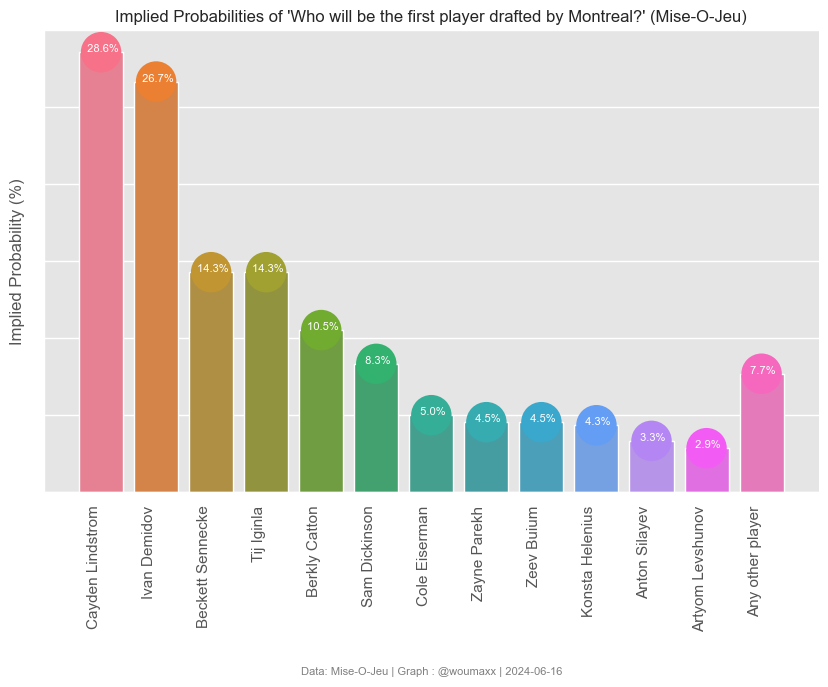

In [77]:
fig, ax = plt.subplots(figsize=(10, 6))


# Add theme
sns.set_theme(style="whitegrid")

# Barplot
sns.barplot(data=df, x='Player', y='Implied Probability (%)',hue="Player", ax=ax,)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

#Add scatter plot to the barplot to show the actual values
sns.scatterplot(data=df, x='Player', y='Implied Probability (%)', ax=ax, hue="Player", s=850, edgecolor='black', linewidth=0)

for i, row in df.iterrows():
    ax.text(i, row['Implied Probability (%)'], f"{row['implied_prob'] : .1%}", color='w', ha="center", fontsize=8)

# Remove the legend
ax.legend_.remove()

# Set the title
ax.set_title("Implied Probabilities of 'Who will be the first player drafted by Montreal?' (Mise-O-Jeu)")

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# Hide the x-axis label
ax.set_xlabel('')
ax.set_ylabel('Implied Probability (%)')

# Hide y ticks
ax.yaxis.set_ticks_position('none')

# Hide y ticks labels
ax.set_yticklabels([])

# Flip x and y axis
# ax.invert_yaxis()

# Hide the grid
# ax.grid(False)

# Add credits
ax.text(0.5, -0.4, f'Data: Mise-O-Jeu | Graph : @woumaxx | {datetime.datetime.now().strftime('%Y-%m-%d')}', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='gray', fontsize=8)

plt.savefig('miseojeu.png', dpi=700, bbox_inches='tight')

# Display the plot
plt.show()



In [78]:
# URL of the page to scrape
url = 'https://sportsbook.draftkings.com/leagues/hockey/nhl?category=nhl-draft&subcategory=pick-number'



# Create a new instance of the Chrome driver
driver = webdriver.Firefox()

try:
    # Navigate to the URL
    driver.get(url)

    # Wait for the table to load (optional, adjust if needed)
    wait = WebDriverWait(driver, 10)

    # # Accept the cookies
    # accept_cookies_xpath = '//*[@id="didomi-notice-agree-button"]'
    # accept_cookies_button = wait.until(EC.element_to_be_clickable((By.XPATH, accept_cookies_xpath)))
    # accept_cookies_button.click()

    table = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'outcomes')))

    # Select all list items with class 'component-29__cell' 
    boxes = wait.until(EC.visibility_of_all_elements_located((By.CLASS_NAME, 'component-29__cell')))

    # Player names span class 'sportsbook-outcome-cell__label'
    player_names = [box.find_element(By.CLASS_NAME, 'sportsbook-outcome-cell__label').text for box in boxes]

    # Odds span class 'sportsbook-odds'
    odds = [box.find_element(By.CLASS_NAME, 'sportsbook-odds').text for box in boxes]



    df_pick2 = pd.DataFrame({'Player': player_names, 'Odds': odds})
    print(df_pick2)

finally:
    # Close the browser
    driver.quit()

              Player    Odds
0   Artyom Levshunov    −250
1       Ivan Demidov    +280
2      Anton Silayev   +1500
3   Cayden Lindstrom   +2200
4    Konsta Helenius  +10000
5   Beckett Sennecke  +10000
6         Zeev Buium  +10000
7       Zayne Parekh  +10000
8      Berkly Catton  +10000
9   Carter Yakemchuk  +10000
10     Sam Dickinson  +10000


In [79]:
# Function to calculate implied probability
def implied_probability(odds):
    if odds > 0:
        return 100 / (odds + 100)
    else:
        return abs(odds) / (abs(odds) + 100)
    
# Function to calculate implied probability
df_pick2['Odds'] = df_pick2['Odds'].str.replace('−', '-')
df_pick2['Odds'] = pd.to_numeric(df_pick2['Odds'])

# Calculate implied probabilities
df_pick2['Implied Probability'] = df_pick2['Odds'].apply(implied_probability)

# Convert probabilities to percentages
df_pick2['Implied Probability (%)'] = df_pick2['Implied Probability'] * 100

df_pick2['generated'] = datetime.datetime.now()

df_pick2['operator'] = 'draftkings'



df_pick2.to_csv(f'draftkings_2nd_ovl_{datetime.datetime.now().strftime('%Y-%m-%d').replace('-', '_')}', index=False)

df_pick2

,Player,Odds,Implied Probability,Implied Probability (%),generated,operator
0,Artyom Levshunov,-250,0.714286,71.428571,2024-06-16 09:44:09.773589,draftkings
1,Ivan Demidov,280,0.263158,26.315789,2024-06-16 09:44:09.773589,draftkings
2,Anton Silayev,1500,0.062500,6.250000,2024-06-16 09:44:09.773589,draftkings
3,Cayden Lindstrom,2200,0.043478,4.347826,2024-06-16 09:44:09.773589,draftkings
4,Konsta Helenius,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings
5,Beckett Sennecke,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings
6,Zeev Buium,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings
7,Zayne Parekh,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings
8,Berkly Catton,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings
9,Carter Yakemchuk,10000,0.009901,0.990099,2024-06-16 09:44:09.773589,draftkings


/var/folders/8b/dctd609n4zsgx5052t61l01c0000gn/T/ipykernel_21519/4007298502.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')


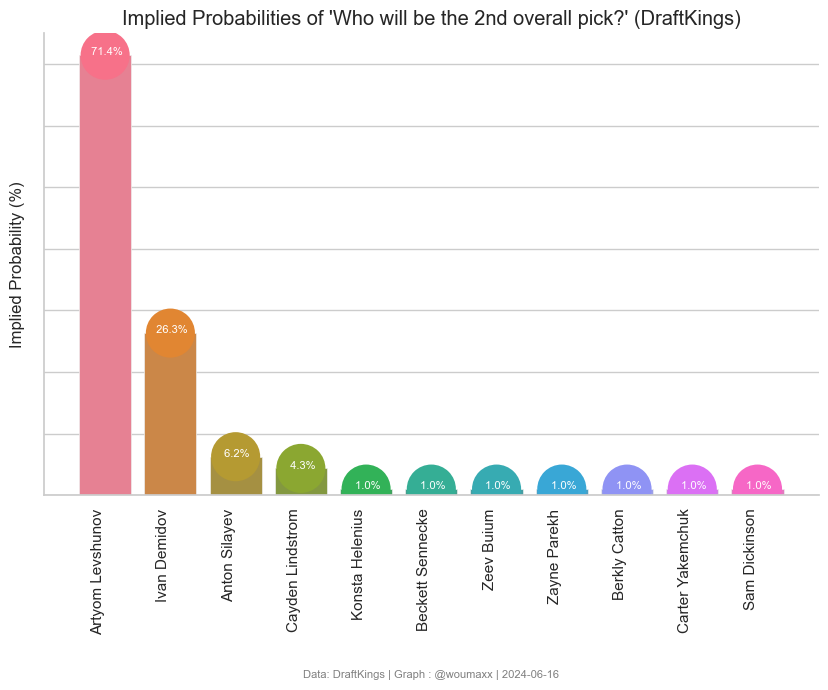

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.style.use('ggplot')
# Add theme
# sns.set_theme(style="whitegrid")

# Barplot
sns.barplot(data=df_pick2, x='Player', y='Implied Probability (%)',hue="Player", ax=ax,)

# # Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

# #Add scatter plot to the barplot to show the actual values
sns.scatterplot(data=df_pick2, x='Player', y='Implied Probability (%)', ax=ax, hue="Player", s=1250, edgecolor='black', linewidth=0)

for i, row in df_pick2.iterrows():
    ax.text(i, row['Implied Probability (%)'], f"{row['Implied Probability'] : .1%}", color='w', ha="center", fontsize=8)

# # Remove the legend
ax.legend_.remove()

# # Set the title
ax.set_title("Implied Probabilities of 'Who will be the 2nd overall pick?' (DraftKings)")

# # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)

# # Hide the x-axis label
ax.set_xlabel('')
ax.set_ylabel('Implied Probability (%)')

# # Hide y ticks
ax.yaxis.set_ticks_position('none')

# # Hide y ticks labels
ax.set_yticklabels([])

# # Flip x and y axis
# # ax.invert_yaxis()

# # Hide the grid
# # ax.grid(False)

# # Add credits
ax.text(0.5, -0.4, f'Data: DraftKings | Graph : @woumaxx | {datetime.datetime.now().strftime('%Y-%m-%d')}', verticalalignment='bottom', horizontalalignment='center',
        transform=ax.transAxes, color='gray', fontsize=8)

# Y limit
# ax.set_ylim(0, 70)

plt.savefig('DK_2nd_ovl.png', dpi=700, bbox_inches='tight')

# # Display the plot
plt.show()


In [81]:
# URL of the page to scrape
url = 'https://sportsbook.draftkings.com/leagues/hockey/nhl?category=nhl-draft&subcategory=draft-position'



# Create a new instance of the Chrome driver
driver = webdriver.Firefox()

try:
    # Navigate to the URL
    driver.get(url)

    # Wait for the table to load (optional, adjust if needed)
    wait = WebDriverWait(driver, 10)

    # # Accept the cookies
    # accept_cookies_xpath = '//*[@id="didomi-notice-agree-button"]'
    # accept_cookies_button = wait.until(EC.element_to_be_clickable((By.XPATH, accept_cookies_xpath)))
    # accept_cookies_button.click()

    table = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, 'sportsbook-event-accordion__children-wrapper')))

    # Select all list items with class 'component-29__cell' 
    boxes = wait.until(EC.visibility_of_all_elements_located((By.CLASS_NAME, 'component-29')))

    # Player names span class 'sportsbook-outcome-cell__label'
    player_names = [box.find_element(By.CLASS_NAME, 'participants').text for box in boxes]

    overs_unders = [[b.text for b in box.find_elements(By.CLASS_NAME, 'sportsbook-outcome-cell__label')]for box in boxes]
    odds = [[b.text for b in box.find_elements(By.CLASS_NAME, 'sportsbook-odds')] for box in boxes]

    



    # print(player_names)
    # print(overs_unders)
    # print(odds)

    # Create DataFrame
    data = []
    for player, pos, odd in zip(player_names, overs_unders, odds):
        data.append([player, pos[0], pos[1], odd[0], odd[1]])

    df_odds = pd.DataFrame(data, columns=['Player', 'Over', 'Under', 'Over Odds', 'Under Odds'])
    df_odds['Player'] = df_odds['Player'].str.replace(' Draft Position', '')
    df_odds['Over'] = df_odds['Over'].str.replace('Over ', '')


    df_odds['Over Odds'] = df_odds['Over Odds'].str.replace('−', '-')
    df_odds['Under Odds'] = df_odds['Under Odds'].str.replace('−', '-')

    df_odds['Over'] = pd.to_numeric(df_odds['Over'])
    # df_odds['Under'] = pd.to_numeric(df_odds['Under'])
    df_odds['Over Odds'] = pd.to_numeric(df_odds['Over Odds'])
    df_odds['Under Odds'] = pd.to_numeric(df_odds['Under Odds'])

    df_odds['Rank'] = df_odds['Over']

    df_odds = df_odds.drop(['Over', 'Under'], axis=1)

    df_odds = df_odds[['Player', 'Rank', 'Over Odds', 'Under Odds']]
    df_odds['Over Probability'] = df_odds['Over Odds'].apply(implied_probability)
    df_odds['Under Probability'] = df_odds['Under Odds'].apply(implied_probability)

    df_odds['Over Probability (%)'] = df_odds['Over Probability'] * 100
    df_odds['Under Probability (%)'] = df_odds['Under Probability'] * 100


    print(df_odds)


finally:
    # Close the browser
    driver.quit()

                     Player  Rank  Over Odds  Under Odds  Over Probability  \
0          Beckett Sennecke  11.5        100        -130          0.500000   
1             Berkly Catton   9.5       -140         110          0.583333   
2          Cayden Lindstrom   4.5       -115        -115          0.534884   
3           Igor Chernyshov  20.5        140        -175          0.416667   
4           Konsta Helenius  11.5       -215         175          0.682540   
5  Michael Brandsegg-Nygard  15.5       -125        -105          0.555556   
6            Sacha Boisvert  25.5        140        -175          0.416667   
7             Stian Solberg  18.5        220        -280          0.312500   
8              Zayne Parekh   7.5       -145         115          0.591837   
9                Zeev Buium   7.5        115        -145          0.465116   

   Under Probability  Over Probability (%)  Under Probability (%)  
0           0.565217             50.000000              56.521739  
1    

In [82]:
df_odds['generated'] = datetime.datetime.now()

df_odds['operator'] = 'draftkings'

df_odds.to_csv(f'draftkings_draft_position_{datetime.datetime.now().strftime('%Y-%m-%d').replace('-', '_')}', index=False)

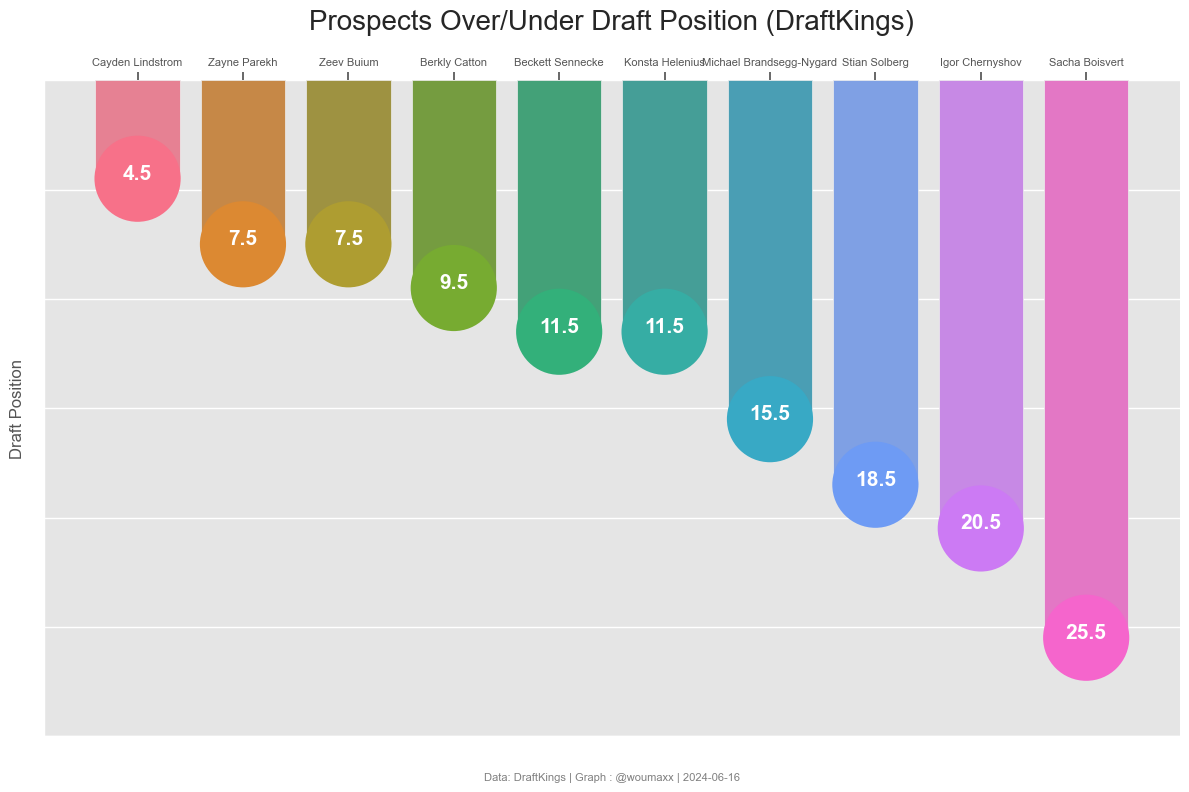

In [83]:
def plot_over_unders(df=df_odds):
    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(12, 8))


    # Add theme
    sns.set_theme(style="whitegrid")

    plt.style.use('ggplot')

    # Sort the DataFrame by 'Rank' column and reset the index
    df = df.sort_values('Rank').reset_index(drop=True)
    # print(df)

    sns.barplot(data=df, x='Player', y='Rank', ax=ax, hue='Player')
    sns.scatterplot(data=df, x='Player', y='Rank', ax=ax, hue='Player', s=3850, edgecolor='black', linewidth=0)
    
    # Plot the rank inside the scatter plot
    for i, row in df.iterrows():
        ax.text(i, row['Rank'], f"{row['Rank']}", color='w', ha="center", fontsize=15, fontweight='bold')

    ax.invert_yaxis()
    # ax.invert_xaxis()
    ax.set_title("Prospects Over/Under Draft Position (DraftKings)", pad=20, fontsize=20)

    # Make more space between the title and the plot
    ax.title.set_position([.5, 2])



    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xlabel('')
    ax.set_ylabel('Draft Position')
    ax.yaxis.set_ticks_position('none')
    ax.set_yticklabels([])
    ax.text(0.5, -0.07, f'Data: DraftKings | Graph : @woumaxx | {datetime.datetime.now().strftime('%Y-%m-%d')}', verticalalignment='bottom', horizontalalignment='center',
            transform=ax.transAxes, color='gray', fontsize=8)
    
    # Have x axis labels on top
    ax.xaxis.tick_top()

    # Make x ticks smaller
    ax.tick_params(axis='x', labelsize=8)

    # Y limit
    ax.set_ylim(30,0)
    
    
    ax.legend_.remove()
    plt.tight_layout()

    plt.savefig(f'DK_over_under.png', dpi=700, bbox_inches='tight')
    return plt.show()

plot_over_unders()